<h1>Best practices</h1

<h2>Tables</h2>

Tables names should:
1. Be lowercase
2. Have no spaces, use underscores instead
3. It should refer to a collective group or be plural

<h2>Fields inside tables</h2>

1. Should be lowercase
2. Have no spaces
3. Be singular
4. Unique for the table
5. Different from the table name


<h1>Query's</h1>

1. Reserved words should be capitalized
2. field names and table names should be lowercase
3. Add semicolon after finishing a query

COUNT(*) tells you how many records are in a table. However, if you want to count the number of non-missing values in a particular field, you can call COUNT() on just that field.



<h1>Order of Execution</h1>

SQL code is not processed in the order it is written.
Order as follows:
1. FROM statement (where are we going to get the data)
2. The SELECT is made (only the columns we specified)
3. Refining the data.

<h1>SQL formatting best practices</h1>

We can checkout a styling guide such as <a href="https://www.sqlstyle.guide">Holywell's style guide</a>

- Use capitalized keywords
- Add new lines
- The guiding principle is writing clear and readable code
- Add a semicolon at the end of a query

If we need to query a non standard field or db table, which is defined using two words, we could use the "field" notation.

Example:

people table:
    - id
    - name
    - birth date

SELECT name,
 "birth date" 
FROM people


<h1>Filtering</h1>

Using where and comparison operators.
Operators for int:
<
>
<=
=>
=
<>

Where for strings:
1. Using = with WHERE field1 = 'STRING'
2. 

WHERE keyword comes after the FROM and before LIMIT keywords

New order of execution:
1. FROM
2. WHERE
3. SELECT
4. LIMIT


<h1>Filtering with multiple criteria</h1>

We could use OR, AND, BETWEEN to do this.

<h2>BETWEEN usage</h2>

Example:

SELECT title
FROM films
WHERE release_year >= 1994 AND release_year <= 2000;

Using Between:
SELECT title
FROM films
WHERE release_year
    BETWEEN 1994 AND 2000;

We have to keep in mind that BETWEEN is inclusive, so in the example above, it will also return the films released in 1994 and 2000.

<h1>Filtering text</h1>

We can use:
1. LIKE: To search for a pattern in a field. We have to use a wildcard as a placeholder for some other values to accomplish this, this wildcards can be % (match zero, or many characters) or the _ (match a single character)
    Examples:
    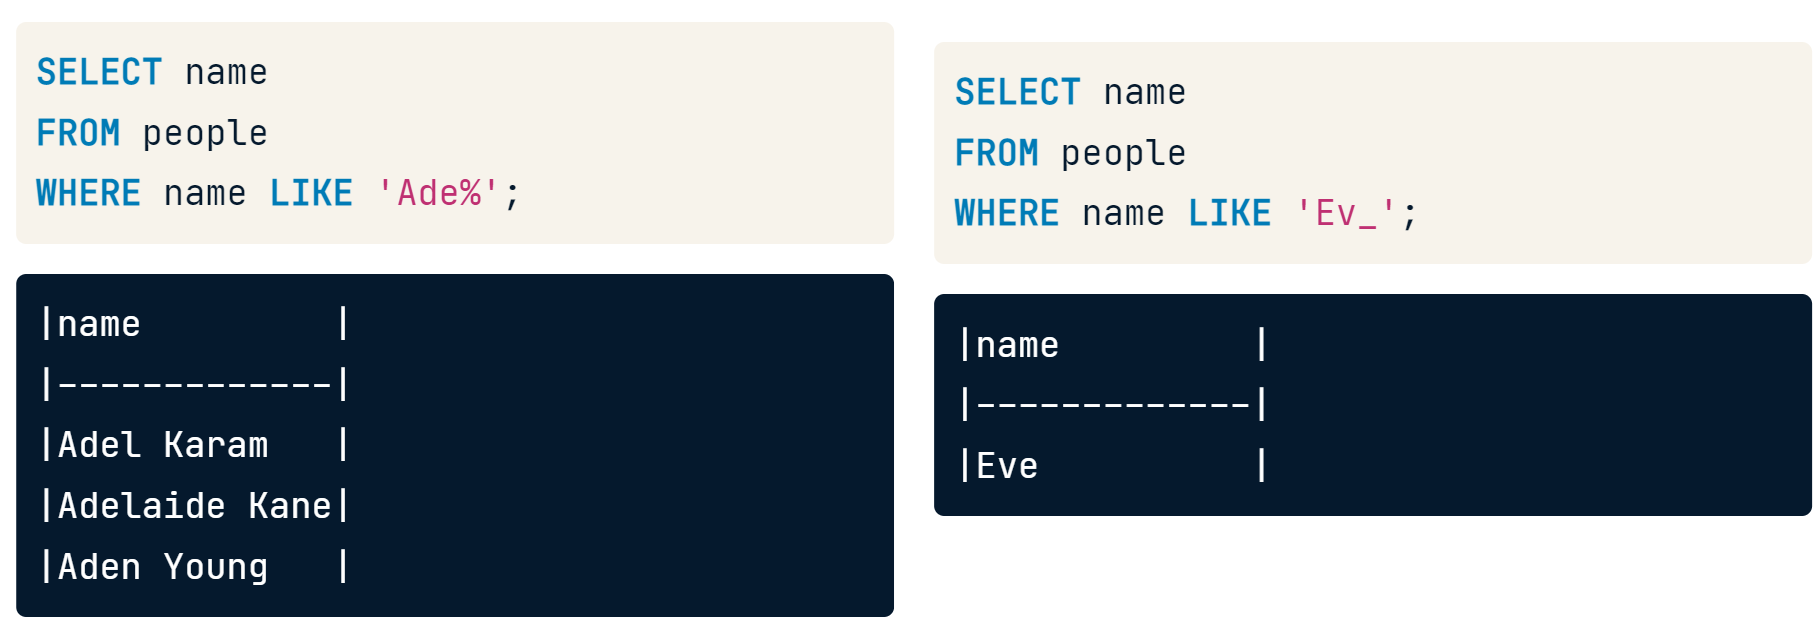

2. NOT LIKE: For records that don't have the values that we specify, it uses the same syntax as LIKE.
3. IN: Is an alternative for multiple evaluations, we can set a set of multiple values that will be evaluated in the query condition.
    Example:
        SELECT title FROM films
            WHERE release_year IN (1920, 1930, 1940);

We can combine the wildcards, here are some examples

1. Will return all the rows that have an r at the end
2. Will return all rows which contain a t as third character

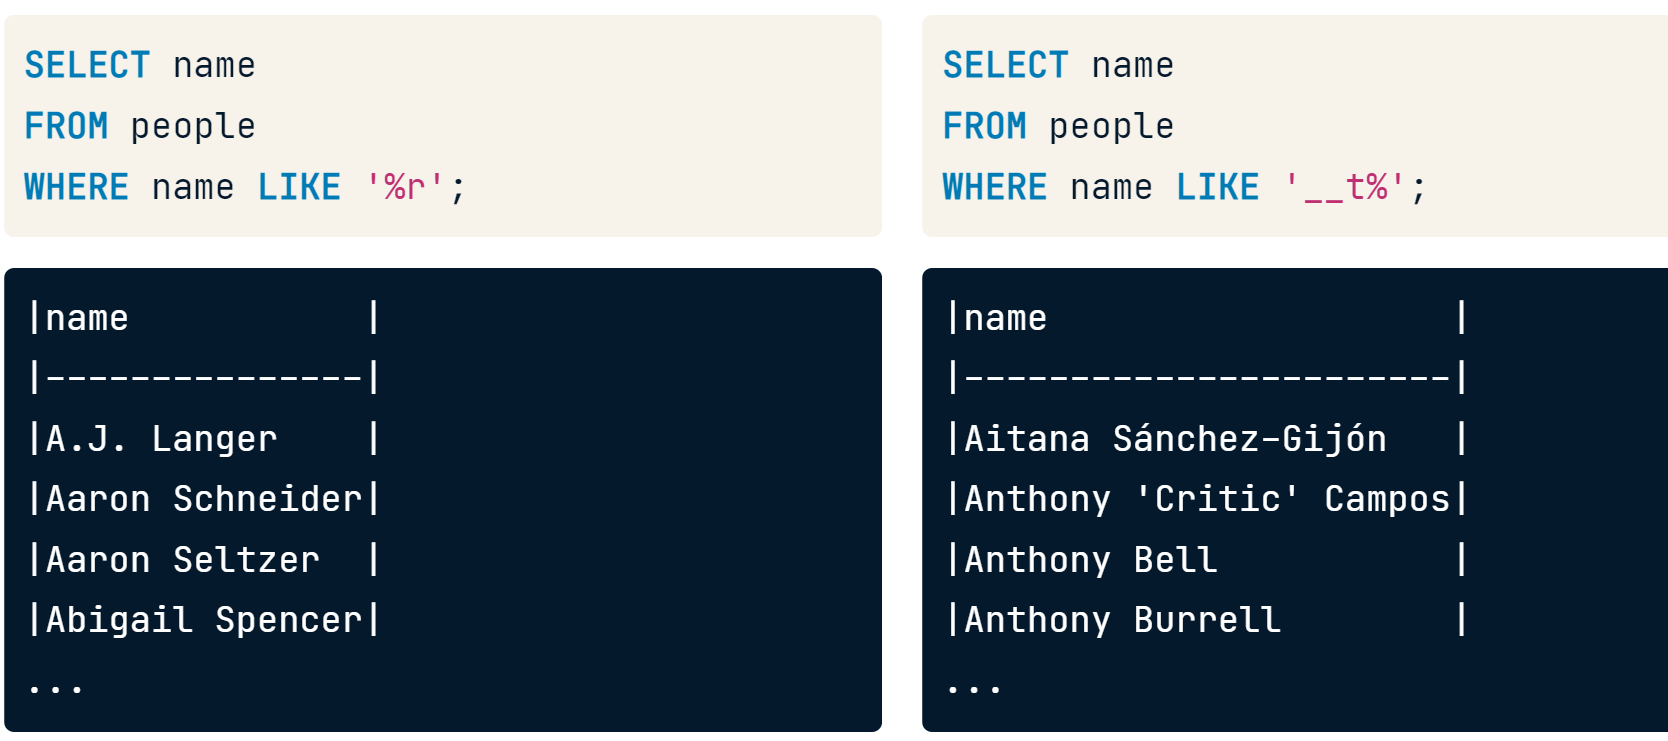

<h1>Null values</h1>

When using aggregate functions we have two types of answers:
- COUNT(field_name) Will include only non-missing values
- COUNT(*) includes missing values.

In SQL we use null for missing or unknown values.

To QUERY null values we could use IS NULL or IS NOT NULL as keywords in a WHERE statement
Example: WHERE field_name IS NOT NULL

COUNT(field_name) and using IS NOT NULL are equal, they will return the same answer.



<h1>Summarizing data</h1>

Using SQL aggregation functions which return a single value.

They come after the select and can be only used on fields (columns) not the records (rows).

These functions appear to be mathematical, but they can be used with both numerical and non-numerical fields.

Examples:
1. AVG()
2. SUM()
3. MIN(), the lowest number, letter A with strings or the earliest date
4. MAX(), the highest number, letter Z with strings or the latest date.
5. COUNT()

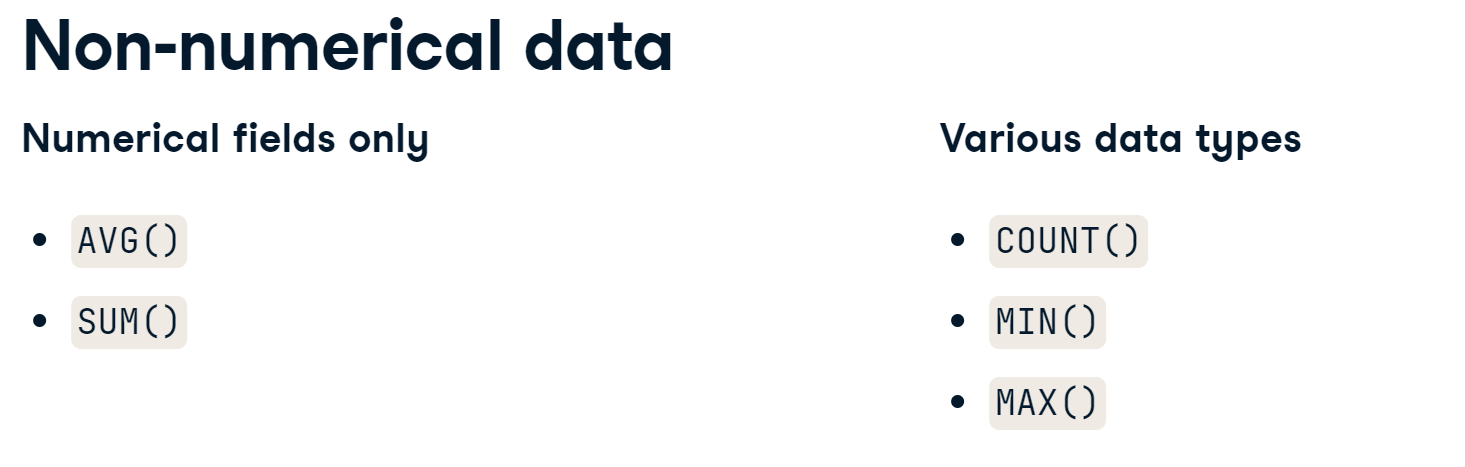

Is a best practice to add an alias when using aggregation functions.

<h2>Summarizing subsets</h2>

Using WHERE with aggregation functions (the where is executed before the select)

ROUND() we can use it to round our number to a specified decimal. It takes two parameters, which are:

ROUND(number_to_round, decimal_places), the second parameters is optional, if we don't specify it, it will return an integer (no decimals)

    We can also use a negative number to round to the left.

<h1>Aliasing and arithmetic</h1>

We can use +, -, * and /, using parentheses with arithmetic indicates to the processor when the calculation needs to execute.

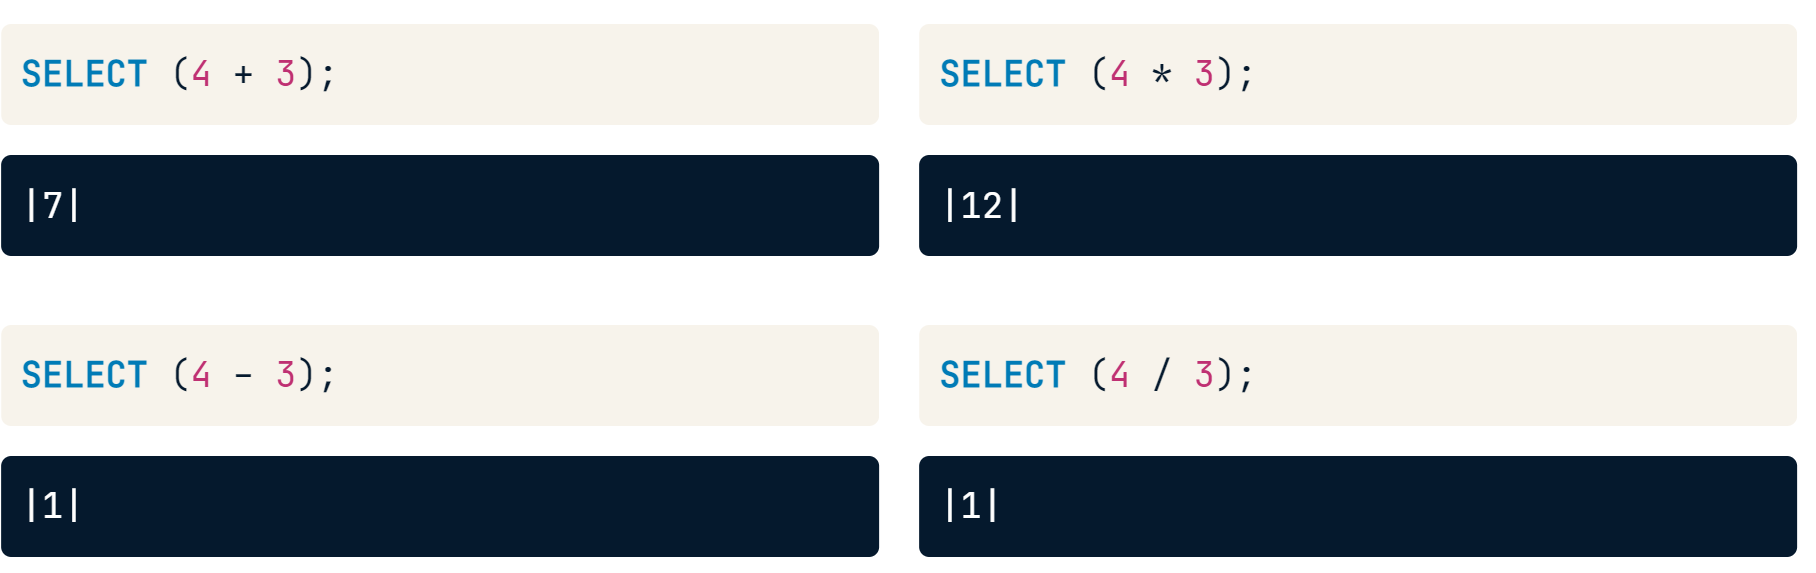

When using integers for division, we will receive an integer back.

The difference between aggregate functions and arithmetic is that aggregation functions are performed on the fields vertically, while arithmetic up the records horizontally:

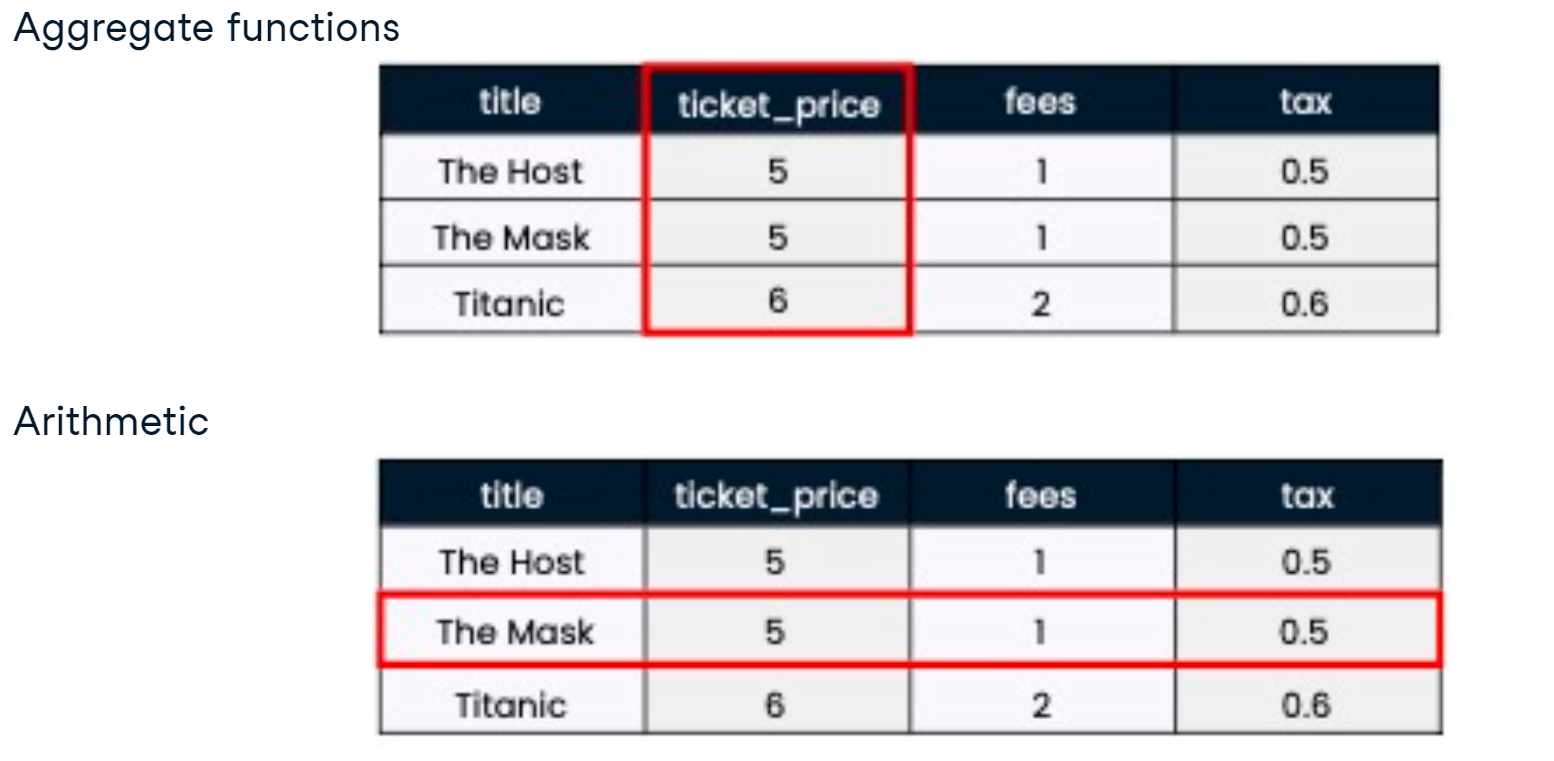

WHen using arithmetics, the resulting columns won't have a name so is a must to use aliasing.

Order of execution in SQL:
1. FROM
2. WHERE
3. SELECT (aliases are defined here)
4. LIMIT

Aliases defined in the SELECT statement cannot be used in the WHERE clause due to order of execution.

<h1>Sorting results</h1>

Using ORDER BY keyword to sort results of one or more fields in ascending order by default (smallest to biggest), we can also specify ASC or DESC to specify the order in which we want the sorting.

ORDER BY field ASC/DESC

When it's used on its own is written after the FROM statement.

It should appear after a WHERE statement. It's not necessary to select the field that we are sorting on but it might be useful.

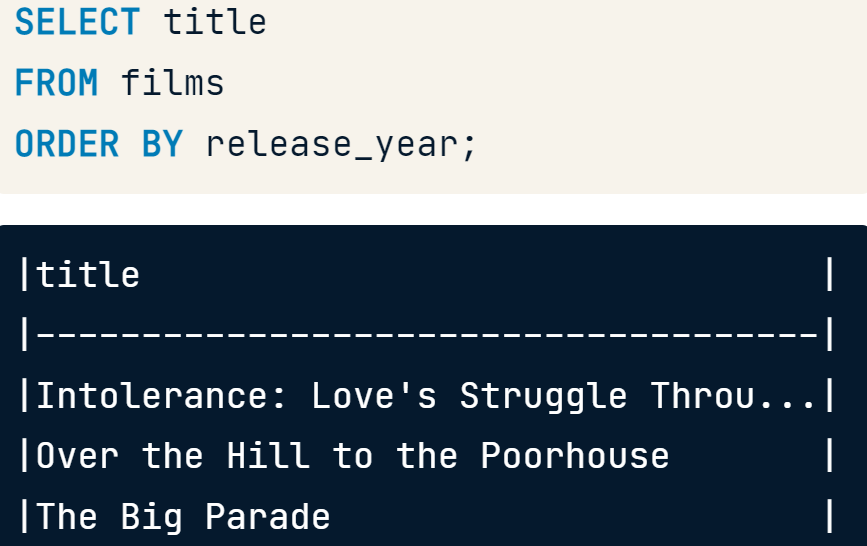

ORDER BY can receive multiple fields, it will sort from left to right, they are separated by coma. The second field is much like a tie-breaker when the first field is not decisive in telling the order.

The ASC and DESC keywords can be used in all of the multiple values:
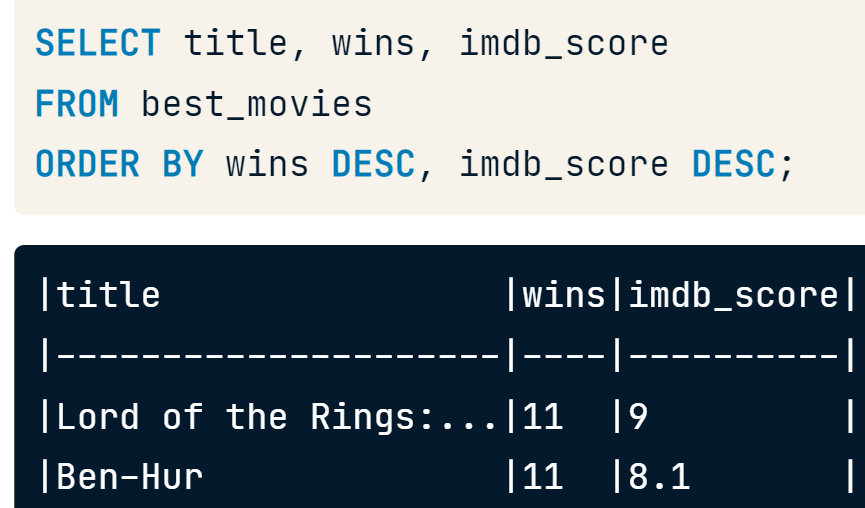

The ORDER BY is at the end of the order of execution, just before the LIMIT keyword.

The second column you order on only steps in when the first column has been ordered.

<h1>Grouping data</h1>

The aggregation functions will reduce the non-grouped fields to one record only, which will need to correspond to one group.

SQL will return an error if we try to SELECT a field that is not in our GROUP BY clause, it will only accept this fields inside aggregation functions.

We can use GROUP BY with multiple fields, the order in which we write the fields affects how the data is grouped. 

We can combine GROUP BY with ORDER BY, we make the calculation (aggregation function) and then order the results. 

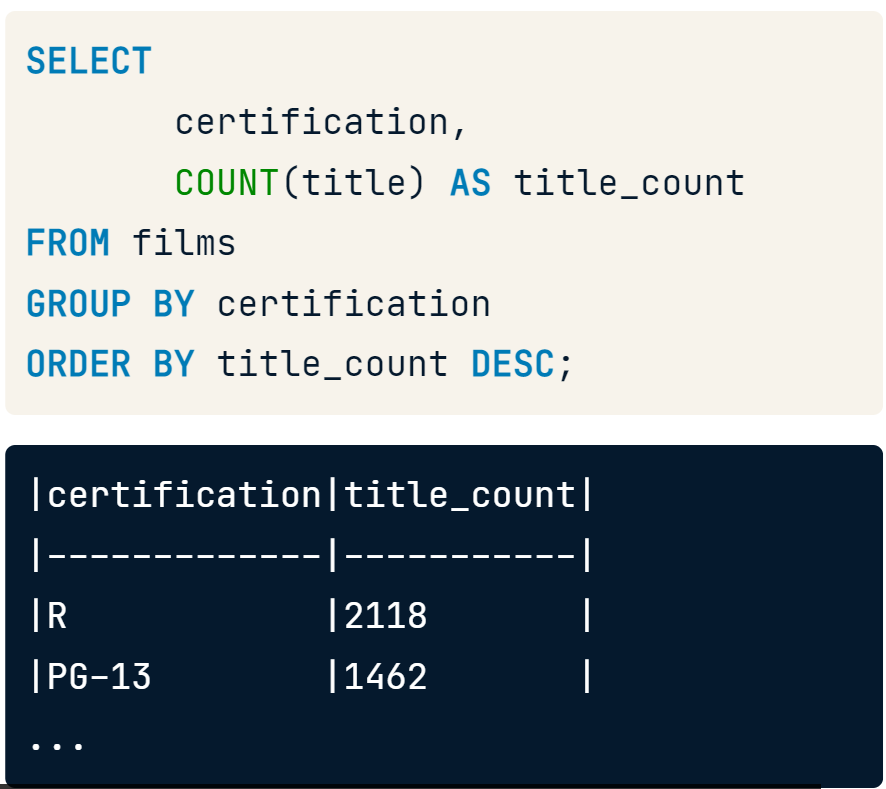

Order by is always written after GROUP BY and we can refer back to the alias within the query.


<h1>Filtering grouped data</h1>

In SQL, we can0t filter aggregate functions with WHERE clauses. That's why, Groups have their own special filtering word (HAVING).

This new keyword is because of the order of execution. 

Order of execution in SQL:
1. FROM
2. WHERE (it's executed before the group by and also before any aggregation function)
3. GROUP BY
4. HAVING
5. SELECT (aliases are defined here)
6. ORDER BY
7. LIMIT

<h2>HAVING vs WHERE</h2>

WHERE for individual records.

HAVING for grouped records.

Example 

````

-- Select the country and distinct count of certification as certification_count
SELECT country,
COUNT(DISTINCT certification) AS certification_count
FROM films
-- Group by country
GROUP BY country
-- Filter results to countries with more than 10 different certifications
HAVING COUNT(DISTINCT certification) > 10





-- Select the country and average_budget from films
SELECT country,
ROUND(AVG(budget), 2) AS average_budget
FROM films
-- Group by country
GROUP BY country
-- Filter to countries with an average_budget of more than one billion
HAVING AVG(budget) > 1000000000
-- Order by descending order of the aggregated budget
ORDER BY average_budget DESC



SELECT release_year, AVG(budget) AS avg_budget, AVG(gross) AS avg_gross
FROM films
WHERE release_year > 1990
GROUP BY release_year
HAVING AVG(budget) > 60000000
-- Order the results from highest to lowest average gross and limit to one
ORDER BY avg_gross DESC
LIMIT 1;
````